## Create Objects in Cyber by Semantic Convention
The Tweet Semantic Convention by JSON is taken from the [cyberLink](https://rebyc.cyber.page/network/bostrom/tx/3EE04317DE0AFEDAA826CC24A6062BC89339B9CF7F780E33ADC04E8A823F8EEE)

In [1]:
from json import loads, JSONDecodeError
from pprint import pprint
from IPython.display import Image

from src.utils import linking
from src.utils_ipfs import load_from_ipfs, upload_text

TWEET_SEMANTIC_CONVENTION_IPFS_HASH = 'QmfPbUnGPsPUPXSAWW6DqsbCWpURANfg7HWY6MbpE55Shs'

tweet = {"message": "My First Tweet by Semantic Convention QmfPbUnGPsPUPXSAWW6DqsbCWpURANfg7HWY6MbpE55Shs"}

### Get Semantic Convention

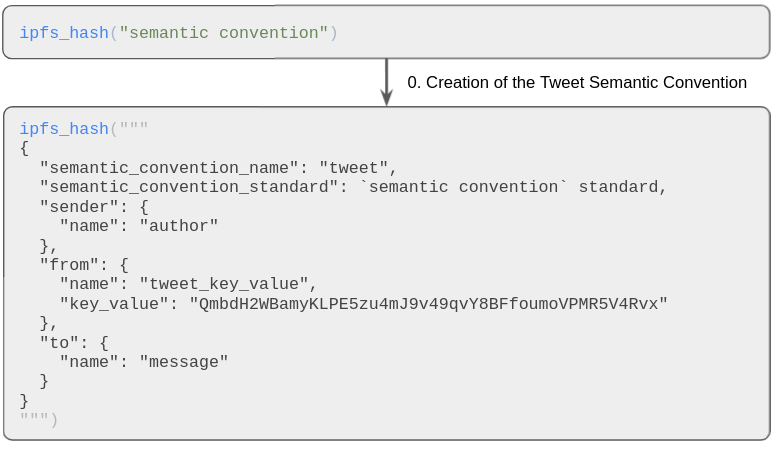

In [2]:
Image(filename='img/tweet_json_definition.png')

In [3]:
def get_semantic_convention_json(
        semantic_convention_ipfs_hash: str,
        semantic_convention_json_keys: set = ('semantic_convention_name', 'semantic_convention_standard', 'sender',
                                              'from', 'to'),
        print_result=True):
    try:
        semantic_convention_data = load_from_ipfs(ipfs_hash=semantic_convention_ipfs_hash)
        if semantic_convention_data:
            _semantic_convention_json = loads(semantic_convention_data)
            if print_result:
                print('Semantic Convention by JSON:\n')
                pprint(_semantic_convention_json)
            try:
                assert set(semantic_convention_json_keys).issubset(_semantic_convention_json.keys())
                return _semantic_convention_json
            except AssertionError:
                print('\nis not convention')
    except (JSONDecodeError, TypeError):
        print('is not json')
    return None

tweet_semantic_convention_json = \
    get_semantic_convention_json(
        semantic_convention_ipfs_hash=TWEET_SEMANTIC_CONVENTION_IPFS_HASH)

Semantic Convention by JSON:

{'from': {'key_value': 'QmbdH2WBamyKLPE5zu4mJ9v49qvY8BFfoumoVPMR5V4Rvx',
          'name': 'tweet_key_value'},
 'semantic_convention_name': 'tweet',
 'semantic_convention_standard': 'QmVbZDBGBxWkwHXbcA3nj3L5psHU7TMruT7VnvCHq4gHVF',
 'sender': {'name': 'author'},
 'to': {'name': 'message'}}


### Get cyberLink Candidates

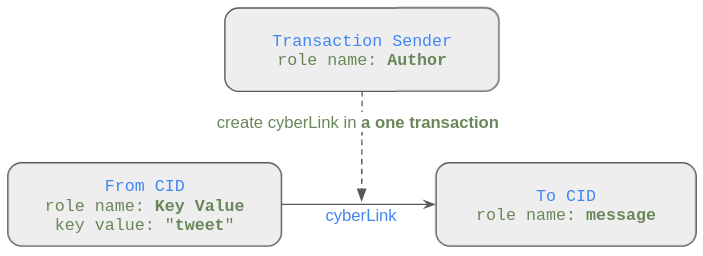

In [4]:
Image(filename='img/tweet_object.png')

In [5]:
def get_link_candidates(source_object, semantic_convention_json):
    _link_candidates = {}
    for _key in [key for key in semantic_convention_json.keys() if key[:2] == 'to' or key[:4] == 'from']:
        _link_index = int(_key.split('_')[-1].replace(_key.split('_')[0], '0'))
        _link_key = _key.split('_')[0]
        if _link_index not in _link_candidates.keys():
            _link_candidates[_link_index] = {}
        if 'key_value' in semantic_convention_json[_key].keys():
            _link_candidates[_link_index][_link_key] = semantic_convention_json[_key]['key_value']
        else:
            _link_candidates[_link_index][_link_key], _  = \
                upload_text(source_object[semantic_convention_json[_key]['name']])
            assert _link_candidates[_link_index][_link_key]
    return [[_link_candidates[index]['from'], _link_candidates[index]['to']] for index in sorted(_link_candidates.keys())]

link_candidates = \
    get_link_candidates(
        source_object=tweet,
        semantic_convention_json=tweet_semantic_convention_json)

Uploading text: My First Tweet by Semantic Convention QmfPbUnGPsPUPXSAWW6DqsbCWpURANfg7HWY6MbpE55Shs


### Create cyberLinks ([Transaction](https://rebyc.cyber.page/network/bostrom/tx/9299555CFA48E7FE5B81418DFDF0E6577BF45F1B9CC02E5E42D1A23AEB9E17D3))

In [6]:
linking(link_candidates=link_candidates)

cyberLink from QmbdH2WBamyKLPE5zu4mJ9v49qvY8BFfoumoVPMR5V4Rvx to QmVTKWAAspcBjrrWnF5Q4rEEimwez3gScQKJbJQN4Jijuu
{'code': 0,
 'codespace': '',
 'data': '',
 'hash': '35F94CB9ADDE6CF3E82B943B4BD5647F104CCA102E69A3E05CB124E61D532422',
 'log': '[]'}
